# Add pickles files

In [37]:
import pandas as pd
import numpy as np

Import number of point of interest by areas in Shanghai

In [38]:
df_poi_per_district = pd.read_pickle("../df/savedDF_POI_per_district.pickle")
df_poi_per_district.tail()

,NAME,TYPE,geometry,restaurant,Bicycle_park,Bus,Railway_station_entrance_exit,Convenience Store,Scenic_spot,Sport
261,???,2,POLYGON Z ((121.1862384675836 31.8099683739087...,15,123,0,0,2,4,1
262,????,2,POLYGON Z ((121.4058121348967 31.7971580391189...,0,1,0,0,0,0,0
263,???,2,POLYGON Z ((121.2444386611607 31.8444776771300...,17,57,0,0,5,1,5
264,????,2,POLYGON Z ((121.2677116383976 31.8487056227307...,0,1,0,0,0,0,0
265,???,2,POLYGON Z ((121.3905549664326 31.8229035233553...,0,21,0,0,3,0,2


In [39]:
mobike = pd.read_pickle('../df/mobike.pickle')
green_spaces = pd.read_pickle('../df/green_spaces.pickle')
taxi = pd.read_pickle('../df/result_taxi.pkl')

In [40]:
green_spaces.head()

,new_geometry,green_area,green_area_proportion
0,"POLYGON ((121.4216787977396 30.68471241129954,...",0.0,0.0
1,"POLYGON ((121.4119888989075 30.69373873372381,...",0.0,0.0
2,"POLYGON ((121.4016307330431 30.70717349199074,...",0.0,0.0
3,"POLYGON ((121.3368669670694 30.73806038215502,...",0.0,0.0
4,"POLYGON ((121.2514316037695 30.79176530954291,...",0.0,0.0


In [41]:
bikes_available = {}

for index, bikes in mobike['mobike_available'].items():
    bikes_available[index] = bikes

In [42]:
nb_taxis = {}

for index, taxis in taxi['nb_taxi'].items():
    nb_taxis[index] = taxis

In [43]:
green_area = {}

for index, green in green_spaces['green_area_proportion'].items():
    green_area[index] = green

In [45]:
df_poi_per_district['bikes_available'] = bikes_available.values()
df_poi_per_district['taxi_number'] = nb_taxis.values()
df_poi_per_district['green_proportion'] = green_area.values()

In [46]:
df_poi_per_district.tail()

,NAME,TYPE,geometry,restaurant,Bicycle_park,Bus,Railway_station_entrance_exit,Convenience Store,Scenic_spot,Sport,bikes_available,taxi_number,green_proportion
261,???,2,POLYGON Z ((121.1862384675836 31.8099683739087...,15,123,0,0,2,4,1,0.0,0,0.0
262,????,2,POLYGON Z ((121.4058121348967 31.7971580391189...,0,1,0,0,0,0,0,0.0,0,0.0
263,???,2,POLYGON Z ((121.2444386611607 31.8444776771300...,17,57,0,0,5,1,5,0.0,0,0.0
264,????,2,POLYGON Z ((121.2677116383976 31.8487056227307...,0,1,0,0,0,0,0,0.0,0,0.0
265,???,2,POLYGON Z ((121.3905549664326 31.8229035233553...,0,21,0,0,3,0,2,0.0,0,0.0


# Target

*target* is what we try to predict. It's the result of a survey in Shanghai, were we quantified people's wellbeing with 3 criteria of their neighbourhood: smell, noise, and clean (which is a vague notion that also mean beautifulness). To predict these 3 values, we are going to create a weighted average, playing with the coef to have the more significant value.

In [47]:
target = pd.read_pickle("../df/TARGET-communities-extract-wellbeing.pkl")

In [48]:
df_target = pd.DataFrame(data=target, columns=target[0])
df_target = df_target.drop(df_target.index[0])
df_target.head()

,,clean,smell,noise,town,district,longitude,latitude
1,万寿社区居委会,3,0.0,0.0,盈浦街道,青浦区,121.104287016932,31.1558823799679
2,万泰花园第一居委会,3,1.0,0.0,七宝镇,闵行区,121.351529089795,31.144326843509
3,万科阳光苑居委会,2,0.0,0.0,吴泾镇,闵行区,121.468520387505,31.0422853979528
4,万豪居委会,3,0.0,0.0,长征镇,普陀区,121.367237458941,31.2407251034807
5,万里名轩社区居委会,2,,0.0,万里街道,普陀区,121.403601417271,31.269155049366


# conversion

In [49]:
df_target = df_target[df_target['clean']!= '']
df_target = df_target[df_target['smell']!= '']
df_target = df_target[df_target['noise']!= '']
df_target = df_target[df_target['longitude']!= '']
df_target = df_target[df_target['latitude']!= '']


df_target['clean'] = df_target['clean'].apply(lambda x: float(x))
df_target['smell'] = df_target['smell'].apply(lambda x: float(x))
df_target['noise'] = df_target['noise'].apply(lambda x: float(x))
df_target['longitude'] = df_target['longitude'].apply(lambda x: float(x))
df_target['latitude'] = df_target['latitude'].apply(lambda x: float(x))

Smell and noise are binaries, 0 meaning no smell or noise. As a 4 in clean means very beautiful, we transformed every 0s in 1s, and vice versa.

In [50]:
df_target['smell'] = df_target['smell'].apply(lambda x: 1 if x==0  else 0)
df_target['noise'] = df_target['noise'].apply(lambda x: 1 if x==0  else 0)
df_target.head()

,,clean,smell,noise,town,district,longitude,latitude
1,万寿社区居委会,3.0,1,1,盈浦街道,青浦区,121.104287,31.155882
2,万泰花园第一居委会,3.0,0,1,七宝镇,闵行区,121.351529,31.144327
3,万科阳光苑居委会,2.0,1,1,吴泾镇,闵行区,121.468520,31.042285
4,万豪居委会,3.0,1,1,长征镇,普陀区,121.367237,31.240725
6,万馨居委会,3.0,1,1,川沙新镇,浦东新区,121.668506,31.195306


# creation of the weighted average

In [53]:
clean_weight = 2
noise_weight = 1
smell_weight = 2

In [54]:
df_target['mean'] = (clean_weight*df_target['clean'] + clean_noise*df_target['noise'] + clean_smell*df_target['smell'])/(clean_weight+clean_noise+clean_smell)
df_target.head()

,,clean,smell,noise,town,district,longitude,latitude,mean
1,万寿社区居委会,3.0,1,1,盈浦街道,青浦区,121.104287,31.155882,1.8
2,万泰花园第一居委会,3.0,0,1,七宝镇,闵行区,121.351529,31.144327,1.4
3,万科阳光苑居委会,2.0,1,1,吴泾镇,闵行区,121.468520,31.042285,1.4
4,万豪居委会,3.0,1,1,长征镇,普陀区,121.367237,31.240725,1.8
6,万馨居委会,3.0,1,1,川沙新镇,浦东新区,121.668506,31.195306,1.8


# creation of geometrical points for each survey location

In [55]:
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd

In [56]:
df_ML = df_target[['mean','longitude','latitude']]

In [57]:
geometry = [Point(xy) for xy in zip(df_ML['longitude'], df_ML['latitude'])]

In [58]:
df_ML['geometry'] = geometry

/Users/rami/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
df_ML.head()

,mean,longitude,latitude,geometry
1,1.8,121.104287,31.155882,POINT (121.104287016932 31.1558823799679)
2,1.4,121.351529,31.144327,POINT (121.351529089795 31.144326843509)
3,1.4,121.468520,31.042285,POINT (121.468520387505 31.0422853979528)
4,1.8,121.367237,31.240725,POINT (121.367237458941 31.2407251034807)
6,1.8,121.668506,31.195306,POINT (121.668505522212 31.1953057158861)


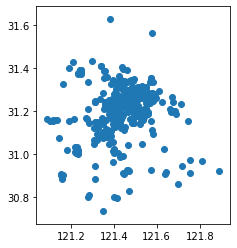

In [60]:
gdf = gpd.GeoDataFrame(df_ML, geometry=df_ML.geometry)
gdf.plot()

cluster these values into the previous neighborhoods

In [61]:
happiness = {}
nb = 0
sum_mean = 0
for index, polygon in df_poi_per_district['geometry'].items():
    for mean, point in zip(df_ML['mean'], df_ML['geometry']):
        if point.within(polygon) == True:
            sum_mean += mean
            nb += 1
    if nb != 0 : 
        happiness[index] = sum_mean/nb
    else:
        happiness[index] = 0
    sum_mean = 0
    nb = 0

In [ ]:
df_poi_per_district['happiness'] = happiness.values()
df_poi_per_district

# Machine Learning

## définition des classes

In [102]:
df_poi_per_district.columns

Index(['NAME', 'TYPE', 'geometry', 'restaurant', 'Bicycle_park', 'Bus',
       'Railway_station_entrance_exit', 'Convenience Store', 'Scenic_spot',
       'Sport', 'bikes_available', 'taxi_number', 'green_proportion',
       'happiness'],
      dtype='object')

In [103]:
X = df_poi_per_district[['restaurant', 'Bicycle_park', 'Bus', 'Railway_station_entrance_exit', 'Convenience Store', 'Scenic_spot', 'Sport', 'bikes_available', 'taxi_number', 'green_proportion']]
Y = df_poi_per_district['happiness']

In [105]:
from sklearn import preprocessing

#x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_normalize = pd.DataFrame(X_scaled)

In [106]:
print(np.median(Y))
Z = pd.DataFrame.copy(Y)
Z[Y <= np.median(Y)] = 'Unhappy'
Z[Y > np.median(Y)] = 'Happy'

0.0


## division en set de test et de train

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, Z_train, Z_test = train_test_split(X_normalize, Z, test_size=0.25, random_state=42)

# Decision Tree

In [108]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
clf = tree.DecisionTreeClassifier(max_depth=9)
scores = cross_val_score(clf, X_train, Z_train, cv=ShuffleSplit(n_splits=5))
np.mean(scores)

0.64

In [110]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2, 4, 6, 8, 10, 20, 40], 'criterion': ['gini','entropy']}
search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=ShuffleSplit(n_splits=5))
search.fit(X_train,Z_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', '

In [119]:
search.best_estimator_
search.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [122]:
clf = tree.DecisionTreeClassifier(max_depth=4, criterion= 'entropy')
scores = cross_val_score(clf, X_train, Z_train, cv=ShuffleSplit(n_splits=5))
np.mean(scores)

0.7100000000000001

# Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
param_grid={'n_estimators':[10,11,12,13]}
clf=RandomForestClassifier()
search=GridSearchCV(clf,param_grid,cv=5)
search.fit(X_train,Z_train)

/Users/rami/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [125]:
search.best_params_

{'n_estimators': 12}

In [126]:
clf=RandomForestClassifier(n_estimators=13)
clf.fit(X_train,Z_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
Z_pred=clf.predict(X_test)
np.mean(Z_pred == Z_test)

0.7164179104477612

# AdaBoost

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
param_grid = {'n_estimators': [10, 20, 30]}
clf = AdaBoostClassifier()
search = GridSearchCV(clf, param_grid, cv= 5)
search.fit(X_train, Z_train)

/Users/rami/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None, param_grid={'n_estimators': [10, 20, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [130]:
search.best_params_

{'n_estimators': 20}

In [131]:
clf = AdaBoostClassifier(n_estimators=20)
clf = clf.fit(X_train, Z_train)
prediction = clf.predict(X_test)
np.mean(prediction == Z_test)

0.7611940298507462

# Gradient Boosting

In [132]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Z_train)
Z_pred = clf.predict(X_test)
np.mean(Z_pred == Z_test)

0.7014925373134329

# K-Neighbours

In [93]:
X.head()

,restaurant,Bicycle_park,Bus,Railway_station_entrance_exit,Convenience Store,Scenic_spot,Sport,bikes_available,taxi_number,green_proportion
0,0,0,0,0,0,0,0,0.0,0,0.0
1,0,0,0,0,0,0,0,0.0,0,0.0
2,0,0,0,0,0,0,0,0.0,0,0.0
3,748,197,0,0,134,28,229,0.0,0,0.0
4,616,335,0,3,163,9,111,0.0,0,0.0


In [94]:
X_normalize.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.157706,0.207587,0.0,0.000000,0.175163,0.085106,0.256439,0.0,0.0,0.0
4,0.129876,0.353003,0.0,0.103448,0.213072,0.027356,0.124300,0.0,0.0,0.0


In [136]:
from sklearn import neighbors, datasets
clf = neighbors.KNeighborsClassifier(weights='uniform', n_neighbors = 15)
scores = cross_val_score(clf, X_train, Z_train, cv=ShuffleSplit(n_splits=20))
np.mean(scores)

0.7424999999999999

# SVC

In [137]:
from sklearn import svm
param_grid = {'kernel': ['rbf', 'linear', 'poly'], 'gamma': ['auto', 'scale']}
clf = svm.SVC()
search = GridSearchCV(clf, param_grid, cv=5)
search.fit(X_train,Z_train)

/Users/rami/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [138]:
search.best_params_

{'gamma': 'auto', 'kernel': 'rbf'}

In [141]:
clf = svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X_train,Z_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [142]:
Z_pred = clf.predict(X_test)
np.mean(Z_pred == Z_test)

0.7164179104477612